<h1 style="text-align: center;">A Simple Neural Network for Linear Regression</h1>

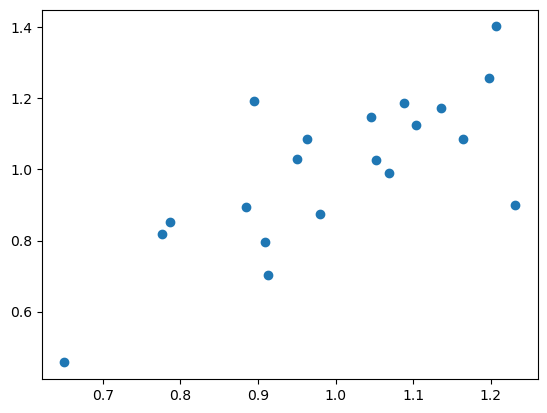

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
           55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
           45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
           48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754]) 
Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
           78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
           55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
           60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

x = X / np.average(X)
y = Y / np.average(Y)

plt.scatter(x, y)

In [8]:
#ReLU
def relu(x):
    return np.maximum(0, x)

# ReLU's derivative
def drelu(x):
    return np.where(x > 0, 1, 0)

In [9]:
# Gradient Descent 

def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001):
    
    # Initialize weights and biases
    w1, w2, w3, w4 = np.random.normal(size=4)
    b1, b2, b3 = np.zeros(3)

    iterations = iterations
    learning_rate = learning_rate
    
    for i in range(iterations):
        
        # They are for simplicity, not to be confused by b1, b2 and b3.
        a = x * w1 + b1
        b = x * w2 + b2
        
        y_predicted = relu(a) * w3 + relu(b) * w4 + b3
        
        # Calculating the gradients for the Loss function
        
        """
        ∂SSR/∂Predicted = - 2 Σ (y - y_pred)
        
        ∂SSR/∂w1 = ∂SSR/∂Predicted * ∂Predicted/∂w1 
        ...
        ...
        ...
        
        ∂SSR/∂b3 = ∂SSR/∂Predicted * ∂Predicted/∂b3  
        
        """
        
        #  ∂SSR/∂Predicted
        dSSR_predicted = -2 *  (y - y_predicted)
        
        # Partial derivatives of SSR with respect to the weigths
        w1_derivative = np.sum(dSSR_predicted * w3 * drelu(a) * x)
        w2_derivative = np.sum(dSSR_predicted * w4 * drelu(b) * x)
        w3_derivative = np.sum(dSSR_predicted * relu(a))
        w4_derivative = np.sum(dSSR_predicted * relu(b)) 
                
        # Partial derivatives of SSR with respect to the biases
        b1_derivative = np.sum(dSSR_predicted * w3 * drelu(a))
        b2_derivative = np.sum(dSSR_predicted * w4 * drelu(b))
        b3_derivative = np.sum(dSSR_predicted)
        
        # Update the weights and biases
        w1 -= (w1_derivative * learning_rate)
        w2 -= (w2_derivative * learning_rate)
        w3 -= (w3_derivative * learning_rate)
        w4 -= (w4_derivative * learning_rate)
        b1 -= (b1_derivative * learning_rate)
        b2 -= (b2_derivative * learning_rate)
        b3 -= (b3_derivative * learning_rate)
    
    return w1, w2, w3, w4, b1, b2, b3

In [10]:
gradient_descent(x, y)

(-0.7691928097125851,
 0.36251553749053883,
 0.13367275745381252,
 0.715234704681701,
 0.0,
 0.30847220726466446,
 0.5254639476376294)

In [11]:
def neural_network(x, y):
    
    w1, w2, w3, w4, b1, b2, b3 = gradient_descent(x, y)
    
    a = x * w1 + b1
    b = x * w2 + b2
    y_predicted = relu(a) * w3 + relu(b) * w4 + b3
    
    return y_predicted

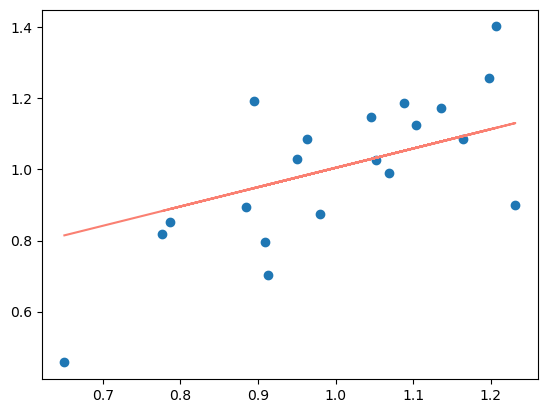

In [12]:
plt.scatter(x, y)
plt.plot(x, neural_network(x, y), color='salmon')
plt.show()